In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_store=pd.read_csv("/content/stores.csv")
df_features=pd.read_csv("/content/features.csv")
df_train=pd.read_csv("/content/train.csv")
df_test=pd.read_csv("/content/test.csv")

In [ ]:
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
#merging 3 dfs
df=df_train.merge(df_features,on=['Store','Date'],how='inner').merge(df_store,on=['Store'],how='inner')

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [ ]:
df.drop(['IsHoliday_y'],axis=1,inplace=True)

In [ ]:
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [ ]:
df.shape

(421570, 16)

In [ ]:
#nunique for finding different number of values
df['Store'].nunique()

45

In [ ]:
df['Dept'].nunique()

81

In [ ]:
# we have 45 stores and 81 depts for stores
store_dept_table=pd.pivot_table(df,index='Store',columns='Dept',values='Weekly_Sales',aggfunc=np.mean)
display(store_dept_table)

Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,...,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,...,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,...,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,...,89248.965524,66535.407203,159365.107902,67815.163007,68159.106573,147236.473706,38346.573077,39339.238951,15009.249371,623.182381
5,9774.553077,12317.953287,4101.085175,9860.806783,6699.202238,1191.057622,6124.484336,13735.709441,7919.805944,9783.395385,...,3059.520000,1457.221678,7759.205594,NaN,411.431486,19340.693986,5985.671119,667.070315,29.976087,NaN
6,23867.553776,50269.437273,16806.638811,34187.366503,34465.307622,7225.566643,34526.870420,47577.719790,48271.060140,47436.477902,...,53715.366084,45270.405175,99024.796503,41359.651189,41701.693497,89208.786294,30450.542238,20637.667063,9728.100629,388.636750
7,9542.801259,22603.690769,8633.536923,14950.518601,13860.350490,6329.928811,10925.757063,13970.619371,29722.736084,21136.560280,...,13858.405874,10263.880000,26530.890559,1328.178252,699.332522,34208.097273,1123.383217,4374.927902,260.886596,15.000000
8,14789.827343,35729.821748,10683.305105,21089.309301,19838.849231,3395.425455,20268.743776,26438.524336,11792.661678,20666.433776,...,39333.566154,31530.560909,60465.630000,27515.635315,25442.578042,62951.463706,16.986667,16978.366503,6880.466434,298.153714
9,11846.558252,24969.477413,7497.356783,17165.947762,19282.746014,2806.416364,13826.694336,21424.470699,13196.569720,12810.480350,...,2981.249510,869.273287,14123.063147,21.240000,599.112568,29575.050769,3596.107762,372.655556,27.930000,NaN


In [ ]:
df.loc[df['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
188,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
406,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
2549,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315
3632,1,54,2011-01-21,-50.00,False,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,7.742,A,151315
4132,1,47,2011-03-11,0.00,False,53.56,3.459,NaN,NaN,NaN,NaN,NaN,214.111056,7.742,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420066,45,49,2012-05-25,-4.97,False,67.21,3.798,5370.39,NaN,361.22,1287.62,2461.81,191.002810,8.567,B,118221
420403,45,49,2012-06-29,-34.00,False,75.22,3.506,3291.36,425.60,NaN,314.88,2255.34,191.099246,8.567,B,118221
420736,45,49,2012-08-03,-1.91,False,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,B,118221
421007,45,54,2012-08-31,0.00,False,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,B,118221


In [ ]:
#delete negative values in sales
df=df.loc[df['Weekly_Sales']>0]

In [ ]:
df.shape

(420212, 16)

In [ ]:
df['Date'].head(5).append(df['Date'].tail(5))

0         2010-02-05
1         2010-02-05
2         2010-02-05
3         2010-02-05
4         2010-02-05
421565    2012-10-26
421566    2012-10-26
421567    2012-10-26
421568    2012-10-26
421569    2012-10-26
Name: Date, dtype: object

In [ ]:
#data from 5 th jan 2010 to 26 th october 2012

<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

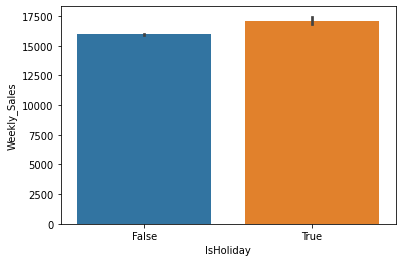

In [ ]:
sns.barplot(x='IsHoliday',y='Weekly_Sales',data=df)

In [ ]:
df_holiday=df.loc[df['IsHoliday']==True]
df_holiday['Date'].unique()

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [ ]:
df_not_holiday=df.loc[df['IsHoliday']==False]
df_not_holiday['Date'].nunique()

133

In [ ]:
#All holidays are not in the data. There are 4 holiday values such as;
# Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
# Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
# Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
# Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
# After the 07-Sep-2012 holidays are in test set for prediction. 

In [ ]:
#superbowldates in train dataset
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [ ]:
# Labor day dates in train set
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False

In [ ]:
# Thanksgiving dates in train set
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [ ]:
#Christmas dates in train set
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False

<AxesSubplot:xlabel='Christmas', ylabel='Weekly_Sales'>

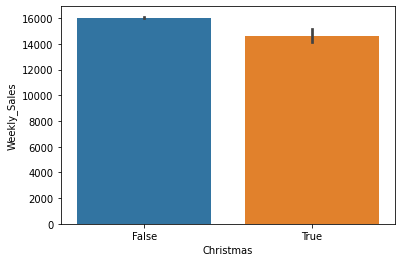

In [ ]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=df)

<AxesSubplot:xlabel='Thanksgiving', ylabel='Weekly_Sales'>

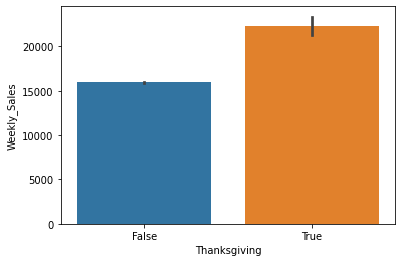

In [ ]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df)

<AxesSubplot:xlabel='Super_Bowl', ylabel='Weekly_Sales'>

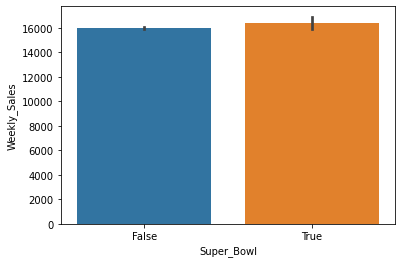

In [ ]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df)

<AxesSubplot:xlabel='Labor_Day', ylabel='Weekly_Sales'>

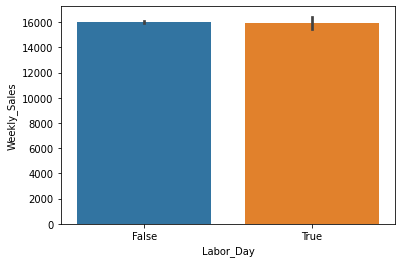

In [ ]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=df)

In [ ]:
#type effect on holidays, there are 3 different store types in the dataset A,B,C
df.groupby(['Christmas','Type'])['Weekly_Sales'].mean()

Christmas  Type
False      A       20174.350209
           B       12301.986116
           C        9570.951973
True       A       18310.167535
           B       11488.988057
           C        8031.520607
Name: Weekly_Sales, dtype: float64

In [ ]:
df.groupby(['Thanksgiving','Type'])['Weekly_Sales'].mean()

Thanksgiving  Type
False         A       20044.007801
              B       12197.717405
              C        9547.377807
True          A       27397.776346
              B       18733.973971
              C        9696.566616
Name: Weekly_Sales, dtype: float64

In [ ]:
df.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean()

Super_Bowl  Type
False       A       20138.055908
            B       12286.739293
            C        9536.110508
True        A       20612.757674
            B       12467.035506
            C       10179.271884
Name: Weekly_Sales, dtype: float64

In [ ]:
df.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean()

Labor_Day  Type
False      A       20151.210941
           B       12294.954138
           C        9542.098293
True       A       20004.267422
           B       12084.304642
           C        9893.459258
Name: Weekly_Sales, dtype: float64

In [ ]:
df['Type'].value_counts()

A    214961
B    162787
C     42464
Name: Type, dtype: int64

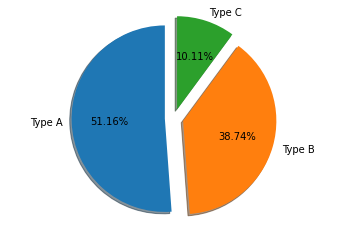

In [ ]:
my_labels=['Type A','Type B','Type C']
sizes=[214961,162787,42464]
plt.pie(sizes,labels=my_labels,startangle=90,shadow=True,explode=(0.1,0.1,0.1),autopct='%1.2f%%')
plt.axis('equal')
plt.show()

In [ ]:
#to see percentage of store types
df.groupby('IsHoliday')['Weekly_Sales'].mean()

IsHoliday
False    15952.816352
True     17094.300918
Name: Weekly_Sales, dtype: float64

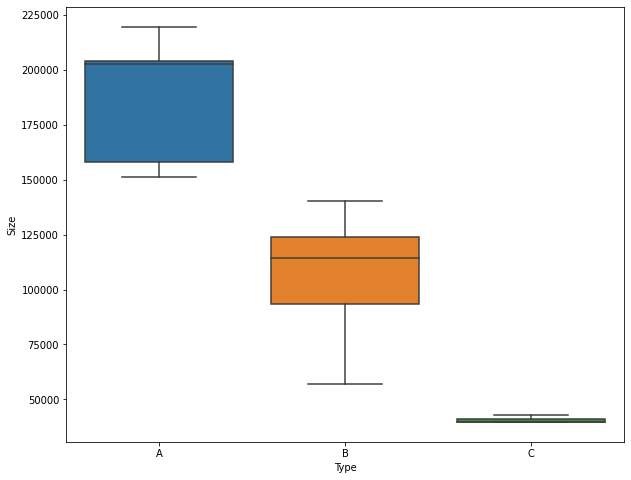

In [ ]:
#size type relation
plt.figure(figsize=(10,8)) # To see the type-size relation
fig = sns.boxplot(x='Type', y='Size', data=df, showfliers=False)

In [ ]:
df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270031
MarkDown2       309308
MarkDown3       283561
MarkDown4       285694
MarkDown5       269283
CPI                  0
Unemployment         0
Type                 0
Size                 0
Super_Bowl           0
Labor_Day            0
Thanksgiving         0
Christmas            0
dtype: int64

In [ ]:
df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
Super_Bowl       object
Labor_Day        object
Thanksgiving     object
Christmas        object
dtype: object

In [ ]:
df=df.fillna(0)

In [ ]:
df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Super_Bowl      0
Labor_Day       0
Thanksgiving    0
Christmas       0
dtype: int64

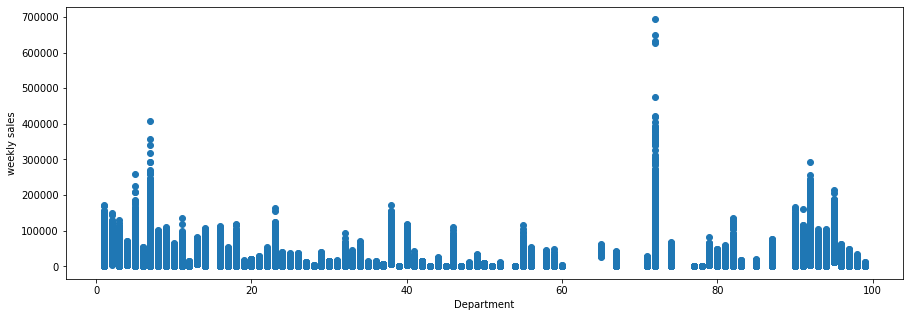

In [ ]:
#weekly sales by dept
plt.figure(figsize=(15,5))
plt.scatter(df['Dept'],df['Weekly_Sales'])
plt.xlabel('Department')
plt.ylabel('weekly sales')
plt.show()

<AxesSubplot:xlabel='Dept', ylabel='Weekly_Sales'>

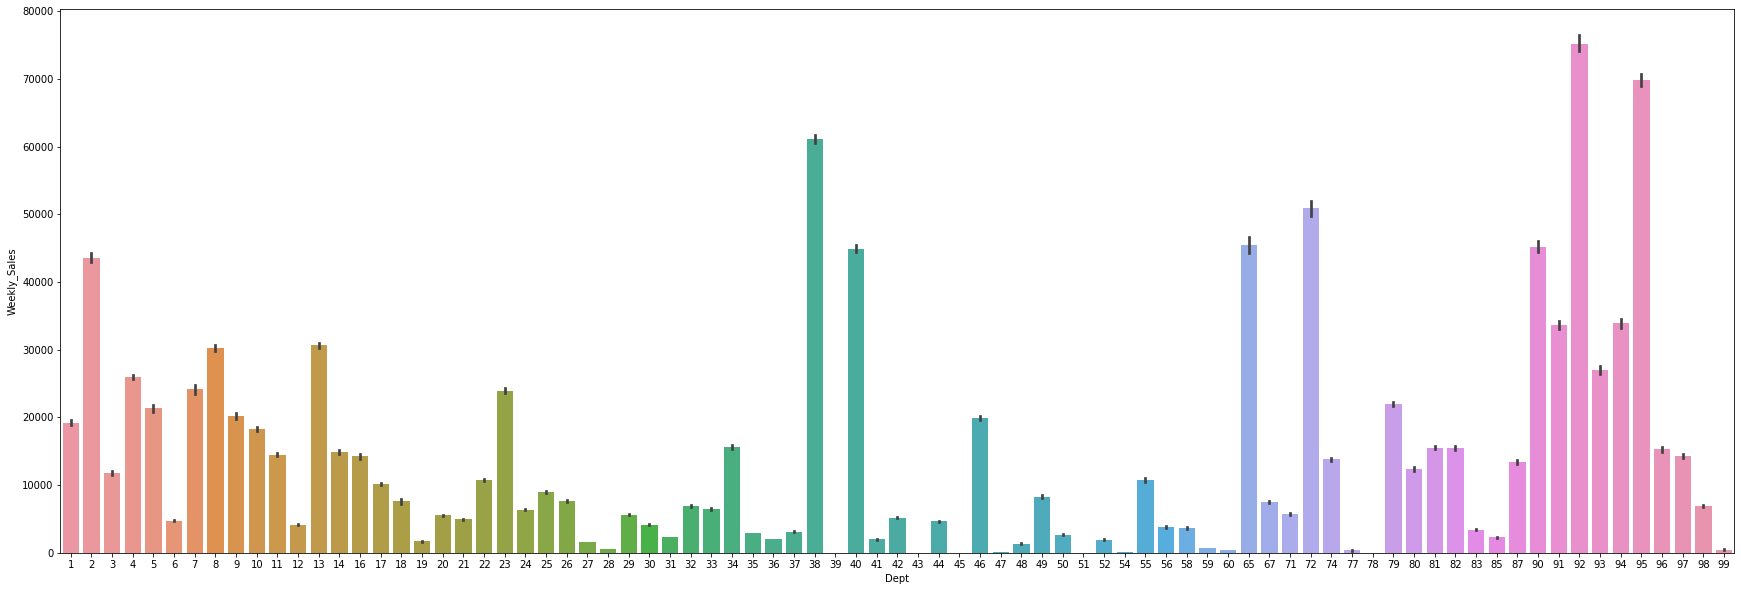

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(x='Dept',y='Weekly_Sales',data=df)

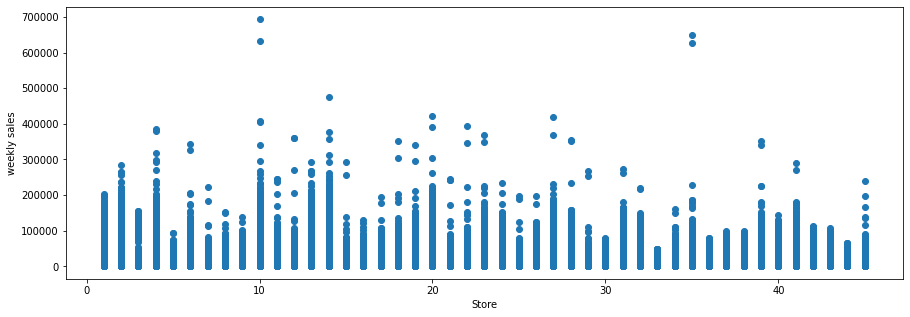

In [ ]:
#weekly sales by store
plt.figure(figsize=(15,5))
plt.scatter(df['Store'],df['Weekly_Sales'])
plt.xlabel('Store')
plt.ylabel('weekly sales')
plt.show()

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

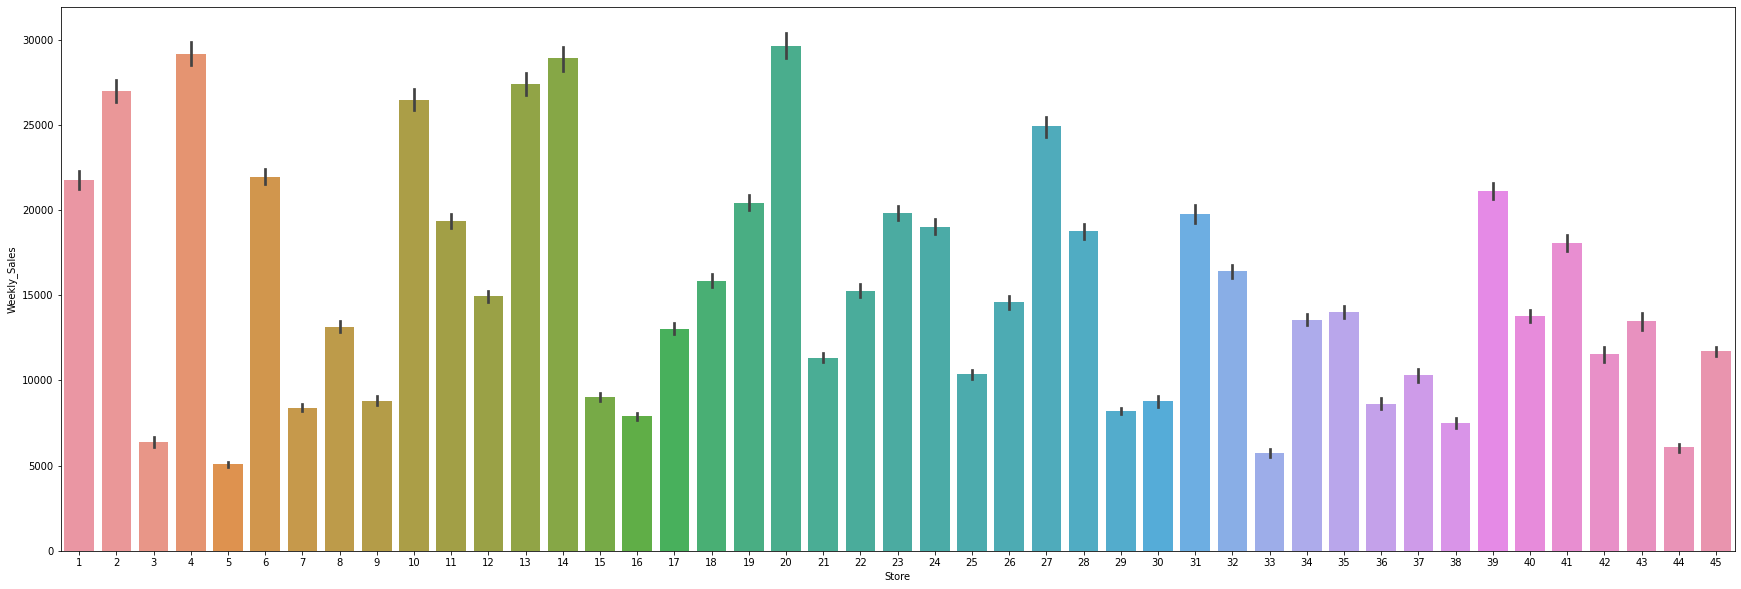

In [ ]:
#avg
plt.figure(figsize=(30,10))
sns.barplot(x='Store',y='Weekly_Sales',data=df)

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False


In [ ]:
df["Date"]=pd.to_datetime(df["Date"])
df['week']=df['Date'].dt.week
df['month']=df['Date'].dt.month
df['year']=df['Date'].dt.year

In [ ]:
df.groupby('month')['Weekly_Sales'].mean()#to see best month for sales

month
1     14182.239153
2     16048.701191
3     15464.817698
4     15696.435193
5     15845.556200
6     16397.605478
7     15905.472425
8     16113.800069
9     15147.216063
10    15279.182119
11    17534.964277
12    19425.798603
Name: Weekly_Sales, dtype: float64

In [ ]:
df.groupby('year')['Weekly_Sales'].mean()

year
2010    16318.648285
2011    16007.797985
2012    15748.265005
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='month'>

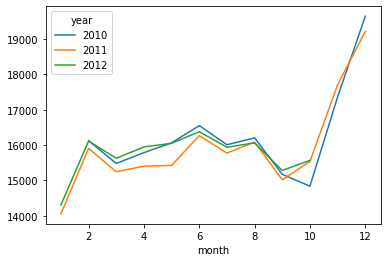

In [ ]:
monthly_sales=pd.pivot_table(df,values="Weekly_Sales",columns='year',index='month')
monthly_sales.plot()

<AxesSubplot:xlabel='month', ylabel='Weekly_Sales'>

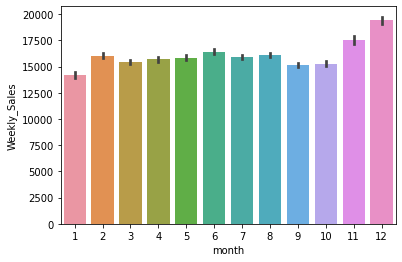

In [ ]:
sns.barplot(x='month', y='Weekly_Sales', data=df)
#highest values are in dec&nov

In [ ]:
df.groupby('week')['Weekly_Sales'].mean().head(3)

week
1    14928.038770
2    14095.340803
3    14133.401201
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='week'>

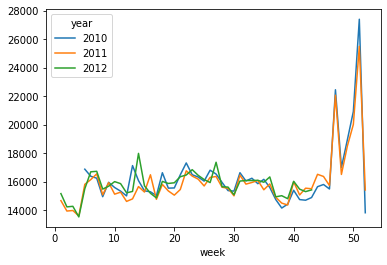

In [ ]:
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()

<AxesSubplot:xlabel='week', ylabel='Weekly_Sales'>

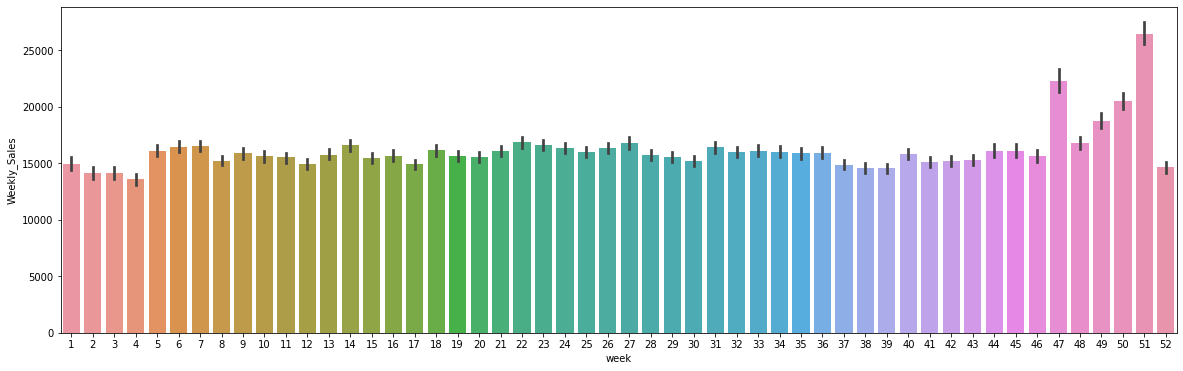

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(x='week', y='Weekly_Sales', data=df)

<AxesSubplot:xlabel='Fuel_Price'>

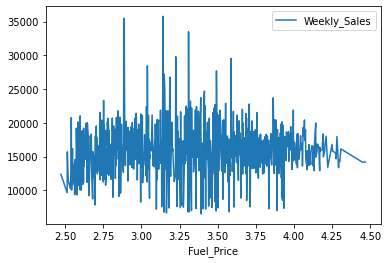

In [ ]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

<AxesSubplot:xlabel='Temperature'>

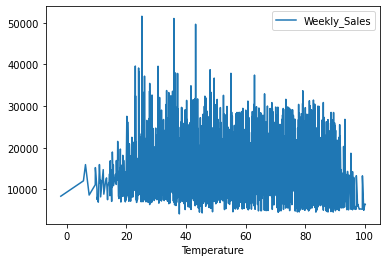

In [ ]:
temp = pd.pivot_table(df, values = "Weekly_Sales", index= "Temperature")
temp.plot()

<AxesSubplot:xlabel='CPI'>

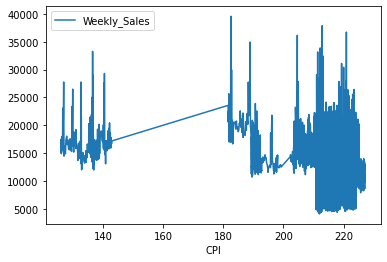

In [ ]:
CPI = pd.pivot_table(df, values = "Weekly_Sales", index= "CPI")
CPI.plot()

<AxesSubplot:xlabel='Unemployment'>

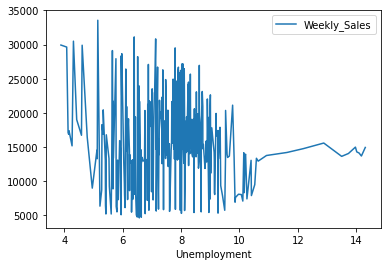

In [ ]:
unemployment = pd.pivot_table(df, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

In [ ]:
#From graphs, it is seen that there are no significant patterns between CPI, temperature, unemployment rate, fuel price vs weekly sales. 

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010


In [ ]:
df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
Super_Bowl                bool
Labor_Day                 bool
Thanksgiving              bool
Christmas                 bool
week                     int64
month                    int64
year                     int64
dtype: object

In [ ]:
type_group={'A':1,'B':2,'C':3}
df['Type']= df['Type'].replace(type_group)

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,...,8.106,1,151315,False,False,False,False,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,...,8.106,1,151315,False,False,False,False,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,...,8.106,1,151315,False,False,False,False,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,...,8.106,1,151315,False,False,False,False,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,...,8.106,1,151315,False,False,False,False,5,2,2010


In [ ]:
df['Super_Bowl']= df['Super_Bowl'].astype(bool).astype(int)

In [ ]:
df['Thanksgiving']= df['Thanksgiving'].astype(bool).astype(int)

In [ ]:
df['Labor_Day']= df['Labor_Day'].astype(bool).astype(int)

In [ ]:
df['Christmas']= df['Christmas'].astype(bool).astype(int)

In [ ]:
df['IsHoliday']= df['IsHoliday'].astype(bool).astype(int)

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,...,8.106,1,151315,0,0,0,0,5,2,2010
1,1,2,2010-02-05,50605.27,0,42.31,2.572,0.0,0.0,0.0,...,8.106,1,151315,0,0,0,0,5,2,2010
2,1,3,2010-02-05,13740.12,0,42.31,2.572,0.0,0.0,0.0,...,8.106,1,151315,0,0,0,0,5,2,2010
3,1,4,2010-02-05,39954.04,0,42.31,2.572,0.0,0.0,0.0,...,8.106,1,151315,0,0,0,0,5,2,2010
4,1,5,2010-02-05,32229.38,0,42.31,2.572,0.0,0.0,0.0,...,8.106,1,151315,0,0,0,0,5,2,2010


In [ ]:
df.drop(['Temperature','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Super_Bowl','Labor_Day','Thanksgiving','Christmas'],axis=1,inplace=True)

In [ ]:
df.head().append(df.tail())

,Store,Dept,Date,Weekly_Sales,IsHoliday,Fuel_Price,Type,Size,week,month,year
0,1,1,2010-02-05,24924.50,0,2.572,1,151315,5,2,2010
330761,35,3,2010-02-05,14612.19,0,2.784,2,103681,5,2,2010
330762,35,4,2010-02-05,26323.15,0,2.784,2,103681,5,2,2010
330763,35,5,2010-02-05,36414.63,0,2.784,2,103681,5,2,2010
330764,35,6,2010-02-05,11437.81,0,2.784,2,103681,5,2,2010
330702,34,14,2012-10-26,8930.71,0,3.514,1,158114,43,10,2012
330703,34,16,2012-10-26,4841.81,0,3.514,1,158114,43,10,2012
330704,34,17,2012-10-26,7035.13,0,3.514,1,158114,43,10,2012
330706,34,20,2012-10-26,2124.60,0,3.514,1,158114,43,10,2012
421569,45,98,2012-10-26,1076.80,0,3.882,2,118221,43,10,2012


In [ ]:
df=df.sort_values(by='Date',ascending=True)

In [ ]:
x=df.drop(['Weekly_Sales','Date'],axis=1)
y=df['Weekly_Sales']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([ 8750.64763303, 15338.31927444, 22392.12922359, ...,
       12409.51224628, 20393.66287948, 20733.83111445])

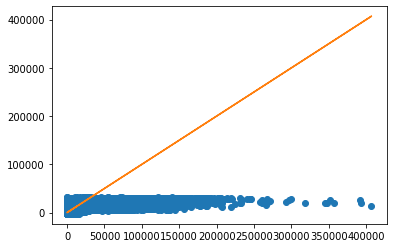

In [ ]:
plt.plot(y_test,y_pred,'o')
plt.plot(y_test,y_test)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_error=mean_squared_error(y_test,y_pred)
root_error=np.sqrt(mean_error)
root_error

21683.307554352334

In [ ]:
from sklearn.metrics import r2_score
r2score=r2_score(y_test,y_pred)
r2score

0.08777815355952445

In [ ]:
print(model.predict([[1,3,0,3.234,2,124536,25,8,2013]]))

[13182.08751454]
